In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline    
import warnings
warnings.filterwarnings("ignore")
import sklearn 

In [84]:
# Finding dataset
baseball = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
baseball.head()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [85]:
baseball.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [86]:
# Checking dataset
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [87]:
# finding null values
baseball.isna().sum().sum()

0

Now we know what data types are there in dataset and the size and shape of it. We also found no null values in the dataset.

In [88]:
# finding co-relation
baseball.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


We can see that RA, ER, ERA are least co-related to wins.

We can see that the column SV has the highest co-relation to Wins. 

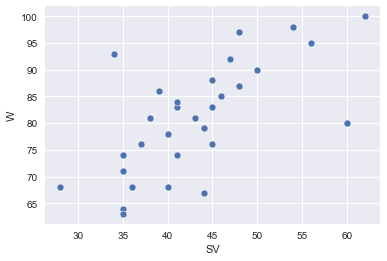

In [89]:
#Plotting vs graph
sns.scatterplot(x='SV', y = 'W', data = baseball)
plt.show()


We can see that the graph is normally distributed. Teams with SV score higher than 45 has more chances of winning. 

In [90]:
# Importing libraries for LR model
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import numpy as np

In [102]:
# Initialising values 
X = baseball[['SV','HR','2B','BB','R','SHO','H','SO','CG','AB','3B','SB','E','RA','ER','ERA']]
y = baseball['W']

In [103]:
# Training dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.25, random_state = 66)

In [104]:
# Creating a logistic regression model

lreg = LogisticRegression(random_state= 42, max_iter = 20000,C=100000)

#Fitting the model using the training set

lreg.fit(X_train, y_train)

# Making the predictions on the training & validation set

y_train_pred = lreg.predict(X_train)

y_val_pred = lreg.predict(X_val)

In [105]:
# Computing the training & validation accuracy using the accuracy_score() function

train_accuracy = accuracy_score(y_train_pred, y_train)
validation_accuracy = accuracy_score(y_val_pred, y_val)

# Print the two accuracies below

print("Train Accuracy", train_accuracy)
print("Validation Accuracy", validation_accuracy)

Train Accuracy 1.0
Validation Accuracy 0.0


The best training accuracy is obtained so we have chosen the right predictors. But the validation accuracy is stuck at 0 beacuse there is no suffiecient data and thus the loss is negligible.

In [106]:
# Using the cross_val_score function 

cv_score = cross_val_score(lreg, X,y, cv=2, scoring = "accuracy")

print("CV Score", cv_score,'\n')

CV Score [0.06666667 0.06666667] 



In [107]:
# Calculating Cross-validation mean and std deviation
cv_score_mean = np.mean(cv_score)
cv_score_std = np.std(cv_score)

print(f"The mean of 2-fold cross validation accuracy is {cv_score_mean} with std deviation {cv_score_std}")
print(f"Compared to the validation accuracy from above {validation_accuracy}") 

The mean of 2-fold cross validation accuracy is 0.06666666666666667 with std deviation 0.0
Compared to the validation accuracy from above 0.0


 We have tried both reducing the data or also increasing the data to overcome the overfitting of model, but still the validation score is constant.Lets try another model.

In [113]:
# Importing Decision Tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [114]:
# Setting the columns as train data predictors
X_train = baseball[['SV','HR','2B','BB','R','SHO']]

# Setting the columns as test data predictors
X_test = baseball[['SV','HR','2B','BB','R','SHO']]

# Set the column win as the train response variable
y_train = baseball['W']

# Set the column win as the test response variable
y_test = baseball['W']

In [115]:
# Initialize a Decision Tree classifier with a depth of 2
dt1 = DecisionTreeClassifier(max_depth=2)

# Fit the classifier on the train data
dt1.fit(X_train, y_train)

# Initialize a Decision Tree classifier with a depth of 10
dt2 = DecisionTreeClassifier(max_depth=10)

# Fit the classifier on the train data
dt2.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10)

In [116]:
# Set of predictor columns
X = ['SV','HR','2B','BB','R','SHO','H','SO','CG','AB','3B','SB','E','RA','ER','ERA']

# Use the columns above as the predictor data from the train data
X_train = baseball[X]

# Use the columns above as the predictor data from the test data
X_test = baseball[X]

# Initialize a Decision Tree classifier with a depth of 2
dt1 = DecisionTreeClassifier(max_depth=2)

# Initialize a Decision Tree classifier with a depth of 10
dt2 = DecisionTreeClassifier(max_depth=10)

# Initialize a Decision Tree classifier with a depth of 15
dt3 = DecisionTreeClassifier(max_depth=15)

# Fit the classifier on the train data
dt1.fit(X_train, y_train)
dt2.fit(X_train, y_train)
dt3.fit(X_train, y_train);

In [117]:

# Compute the train and test accuracy for the first decision tree classifier of depth 2
dt1_train_acc = dt1.score(X_train,y_train)
dt1_test_acc = dt1.score(X_test,y_test)

# Compute the train and test accuracy for the second decision tree classifier of depth 10
dt2_train_acc = dt2.score(X_train, y_train)
dt2_test_acc = dt2.score(X_test, y_test)

# Compute the train and test accuracy for the third decision tree classifier of depth 15
dt3_train_acc = dt3.score(X_train,y_train)
dt3_test_acc = dt3.score(X_test,y_test)

In [120]:
# Checking accuracy scores
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = ['Max Depth', 'Train Accuracy', 'Test Accuracy']
pt.add_row([2, round(dt1_train_acc, 4), round(dt1_test_acc,4)])
pt.add_row([10, round(dt2_train_acc,4), round(dt2_test_acc,4)])
pt.add_row([15, round(dt3_train_acc,4), round(dt3_test_acc,4)])
print(pt)

+-----------+----------------+---------------+
| Max Depth | Train Accuracy | Test Accuracy |
+-----------+----------------+---------------+
|     2     |      0.3       |      0.3      |
|     10    |      1.0       |      1.0      |
|     15    |      1.0       |      1.0      |
+-----------+----------------+---------------+


Analyzing the performance measures of accuracy we can clearly say that our model is performing really well. Thus we can conclude that desicion trees is the best model to predict wins in MLB.